In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import os


In [2]:
TITANIC_PATH = ''

In [3]:
def load_titanic_data(filename, titanic_path=TITANIC_PATH):
    csv_path = os.path.join(titanic_path, filename)
    return pd.read_csv(csv_path)

In [4]:
train_data = load_titanic_data("train.csv")
test_data = load_titanic_data("test.csv")

In [5]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


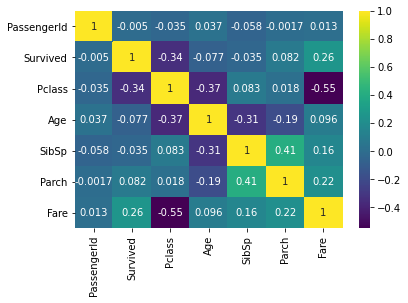

In [7]:
sns.heatmap(train_data.corr(), cmap='viridis', annot=True)

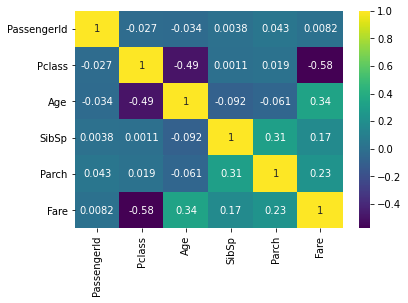

In [8]:
sns.heatmap(test_data.corr(), cmap='viridis', annot=True)

In [9]:
data = pd.concat([train_data, test_data])
data.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  ...      Fare Cabin  Embarked
0              1       0.0       3  ...    7.2500   NaN         S
1              2       1.0       1  ...   71.2833   C85         C
2              3       1.0       3  ...    7.9250   NaN         S
3              4       1.0       1  ...   53.1000  C123         S
4              5       0.0       3  ...    8.0500   NaN         S
..           ...       ...     ...  ...       ...   ...       ...
413         1305       NaN       3  ...    8.0500   NaN         S
414         1306       NaN       1  ...  108.9000  C105         C
415         1307       NaN       3  ...    7.2500   NaN         S
416         1308       NaN       3  ...    8.0500   NaN         S
417         1309       NaN       3  ...   22.3583   NaN         C

[1309 rows x 12 columns]>

{'boxes': [<matplotlib.lines.Line2D at 0x7efbfeb15f10>],
 'caps': [<matplotlib.lines.Line2D at 0x7efbfe654490>,
 'fliers': [<matplotlib.lines.Line2D at 0x7efbfeb2a810>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7efbfe5e61d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7efbfeb15390>,
  <matplotlib.lines.Line2D at 0x7efbfe6540d0>]}

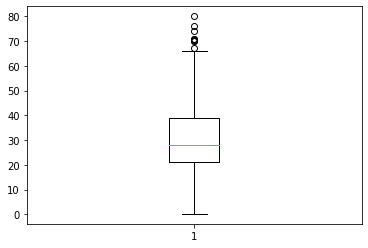

In [10]:
plt.boxplot(data['Age'][data['Age'].notnull()])

In [11]:
data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [12]:
import re

In [13]:
set([re.sub('\d', '', v) for v in data['Cabin'].unique() if type(v) == str])

{'A',
 'B',
 'B B',
 'B B B',
 'B B B B',
 'C',
 'C C',
 'C C C',
 'D',
 'D D',
 'E',
 'E E',
 'F',
 'F E',
 'F G',
 'G',
 'T'}

In [14]:
data['Ticket'].unique()[:50]

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295'], dtype=object)

In [15]:
set([re.sub('\d', '', v) for v in data['Ticket'].unique() if type(v) == str])

{'',
 'A. ',
 'A. . ',
 'A.. ',
 'A./. ',
 'A/ ',
 'A/. ',
 'A/S ',
 'AQ/ ',
 'AQ/. ',
 'C ',
 'C.A. ',
 'C.A./SOTON ',
 'CA ',
 'CA. ',
 'F.C. ',
 'F.C.C. ',
 'Fa ',
 'LINE',
 'LP ',
 'P/PP ',
 'PC ',
 'PP ',
 'S.C./A.. ',
 'S.C./PARIS ',
 'S.O./P.P. ',
 'S.O.C. ',
 'S.O.P. ',
 'S.P. ',
 'S.W./PP ',
 'SC ',
 'SC/A ',
 'SC/A. ',
 'SC/AH ',
 'SC/AH Basle ',
 'SC/PARIS ',
 'SC/Paris ',
 'SCO/W ',
 'SO/C ',
 'SOTON/O ',
 'SOTON/O.Q. ',
 'SOTON/OQ ',
 'STON/O . ',
 'STON/O. ',
 'STON/OQ. ',
 'SW/PP ',
 'W./C. ',
 'W.E.P. ',
 'W/C ',
 'WE/P '}

In [16]:
set([v for v in data['Name'] if '.' in v])

{'Hays, Miss. Margaret Bechstein',
 'Howard, Mr. Benjamin',
 'Dyker, Mrs. Adolf Fredrik (Anna Elisabeth Judith Andersson)',
 'Coutts, Mrs. William (Winnie Minnie" Treanor)"',
 'Head, Mr. Christopher',
 'Dodge, Mrs. Washington (Ruth Vidaver)',
 'Harmer, Mr. Abraham (David Lishin)',
 'Turja, Miss. Anna Sofia',
 'Cook, Mr. Jacob',
 'Stokes, Mr. Philip Joseph',
 'Clarke, Mr. Charles Valentine',
 'Lefebre, Master. Henry Forbes',
 'Lines, Mrs. Ernest H (Elizabeth Lindsey James)',
 'McMahon, Mr. Martin',
 'Parrish, Mrs. (Lutie Davis)',
 'Hunt, Mr. George Henry',
 'Moen, Mr. Sigurd Hansen',
 'Cardeza, Mr. Thomas Drake Martinez',
 'Asplund, Mr. Johan Charles',
 'Rice, Master. George Hugh',
 'Ostby, Mr. Engelhart Cornelius',
 'Gilinski, Mr. Eliezer',
 'McCrie, Mr. James Matthew',
 'Dean, Master. Bertram Vere',
 'Johnston, Mrs. Andrew G (Elizabeth Lily" Watson)"',
 'Sage, Miss. Ada',
 'Cavendish, Mr. Tyrell William',
 'Doling, Miss. Elsie',
 'Miles, Mr. Frank',
 'Williams, Mr. Charles Duane',
 'H

In [17]:
train_data['NameParts'] = [len(v.split(' ')) for v in train_data['Name']]
train_data['NameParts'][:5]

0    4
1    7
2    3
3    7
4    4
Name: NameParts, dtype: int64

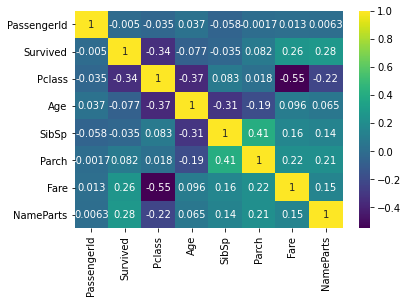

In [18]:
sns.heatmap(train_data.corr(), cmap='viridis', annot=True)

Cabins

In [19]:
len([re.sub('\d', '', v)[0] if type(v) == str else 'Z' for v in data['Cabin']]) == len(data['Cabin'])

True

In [20]:
train_data['CabinLvl'] = [ord(re.sub('\d', '', v)[0]) if type(v) == str else ord('Z') for v in train_data['Cabin']]
train_data['CabinLvl'][:5]

0    90
1    67
2    90
3    67
4    90
Name: CabinLvl, dtype: int64

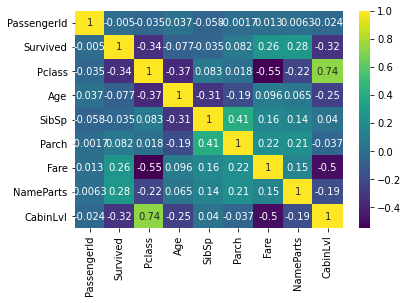

In [21]:
sns.heatmap(train_data.corr(), cmap='viridis', annot=True)

In [22]:
print(train_data.corr()['CabinLvl']['Pclass'])
train_data.drop('CabinLvl', axis=1, inplace=True)
train_data.columns

0.735383132372392


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'NameParts'],
      dtype='object')

In [23]:
len([len(re.sub('[a-zA-Z]', '', v).lstrip().split(' ')) if type(v) == str else 0 for v in data['Cabin']]) == len(data)

True

In [24]:
train_data['CabinsLen'] = [len(re.sub('[a-zA-Z]', '', v).lstrip().split(' ')) if type(v) == str else 0 for v in train_data['Cabin']]

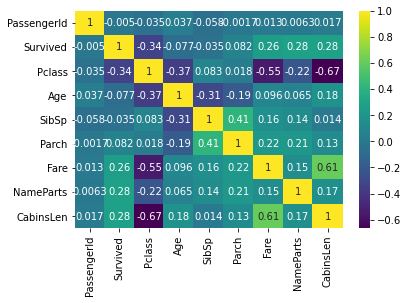

In [25]:
sns.heatmap(train_data.corr(), cmap='viridis', annot=True)

In [26]:
print(train_data.corr()['CabinsLen']['Fare'])
train_data.drop('CabinsLen', axis=1 ,inplace=True)
train_data.columns

0.6110605749082296


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'NameParts'],
      dtype='object')

In [27]:
[v for v in data['Cabin'] if type(v) == str and re.sub('[a-zA-Z]', '', v).lstrip().split(' ')[0] == '']

['D', 'D', 'T', 'D', 'F', 'D']

In [28]:
prepared = [re.sub('[a-zA-Z]', '', v).lstrip().split(' ')[0] if type(v) == str else '' for v in data['Cabin']]
len([int(v) if v != '' else 0 for v in prepared]) == len(data)

True

In [29]:
prepared = [re.sub('[a-zA-Z]', '', v).lstrip().split(' ')[0] if type(v) == str else '' for v in train_data['Cabin']]
train_data['CabinNum'] = [int(v) if v != '' else 0 for v in prepared]

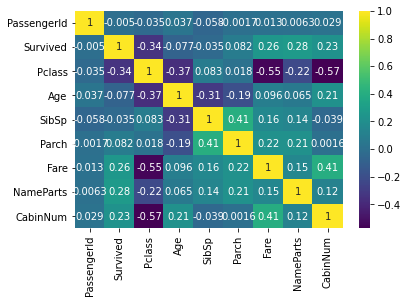

In [30]:
sns.heatmap(train_data.corr(), cmap='viridis', annot=True)

Tickets

In [31]:
[v for v in data['Ticket'] if ' ' in v][:20]

['A/5 21171',
 'PC 17599',
 'STON/O2. 3101282',
 'PP 9549',
 'A/5. 2151',
 'PC 17601',
 'PC 17569',
 'C.A. 24579',
 'PC 17604',
 'A./5. 2152',
 'SC/Paris 2123',
 'S.C./A.4. 23567',
 'A/4. 39886',
 'PC 17572',
 'C.A. 31026',
 'C.A. 34651',
 'CA 2144',
 'PC 17605',
 'C.A. 29395',
 'S.P. 3464']

In [32]:
prepared = [re.sub('\D', '', v).lstrip().split(' ')[0] if type(v) == str else '' for v in data['Ticket']]
# prepared[:50]
[int(v) if v != '' else 0 for v in prepared][:20]

[521171,
 17599,
 23101282,
 113803,
 373450,
 330877,
 17463,
 349909,
 347742,
 237736,
 9549,
 113783,
 52151,
 347082,
 350406,
 248706,
 382652,
 244373,
 345763,
 2649]

In [33]:
len([int(v) if v != '' else 0 for v in prepared]) == len(data)

True

In [34]:
prepared = [re.sub('\D', '', v).lstrip().split(' ')[0] if type(v) == str else '' for v in train_data['Ticket']]
train_data['TicketNum'] = [int(v) if v != '' else 0 for v in prepared]

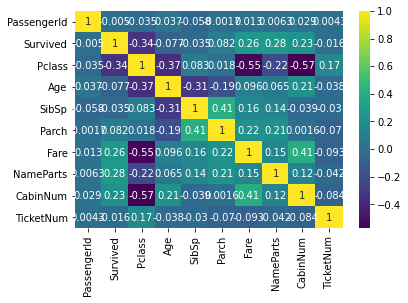

In [35]:
sns.heatmap(train_data.corr(), cmap='viridis', annot=True)

In [36]:
train_data.corr()['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
NameParts      0.278520
CabinNum       0.229756
TicketNum     -0.015615
Name: Survived, dtype: float64

Names - titles

In [37]:
data[['Name', 'Age']][[True if not np.isnan(v) and v < 10 else False for v in data['Age']]][:10]

,Name,Age
7,"Palsson, Master. Gosta Leonard",2.00
10,"Sandstrom, Miss. Marguerite Rut",4.00
16,"Rice, Master. Eugene",2.00
24,"Palsson, Miss. Torborg Danira",8.00
43,"Laroche, Miss. Simonne Marie Anne Andree",3.00
50,"Panula, Master. Juha Niilo",7.00
58,"West, Miss. Constance Mirium",5.00
63,"Skoog, Master. Harald",4.00
78,"Caldwell, Master. Alden Gates",0.83
119,"Andersson, Miss. Ellis Anna Maria",2.00


In [38]:
set([v for v in data['Name'] if len(re.findall('(\w+)\.', v)) > 1])

{'Rothschild, Mrs. Martin (Elizabeth L. Barrett)'}

In [39]:
def get_title(v):
  return re.search('(\w+)\.', v)[0]

In [40]:
from collections import Counter

In [41]:
counts = Counter([get_title(v) for v in data['Name']])#, key = lambda x: x[1])
title_categoriess = sorted(set(get_title(v) for v in data['Name']), key=counts.get, reverse=True)
print(title_categoriess)

['Mr.', 'Miss.', 'Mrs.', 'Master.', 'Dr.', 'Rev.', 'Col.', 'Major.', 'Mlle.', 'Ms.', 'Lady.', 'Jonkheer.', 'Countess.', 'Dona.', 'Capt.', 'Sir.', 'Don.', 'Mme.']


In [42]:
titles = {t: i for i, t in enumerate(title_categoriess)}
titles

{'Capt.': 14,
 'Col.': 6,
 'Countess.': 12,
 'Don.': 16,
 'Dona.': 13,
 'Dr.': 4,
 'Jonkheer.': 11,
 'Lady.': 10,
 'Major.': 7,
 'Master.': 3,
 'Miss.': 1,
 'Mlle.': 8,
 'Mme.': 17,
 'Mr.': 0,
 'Mrs.': 2,
 'Ms.': 9,
 'Rev.': 5,
 'Sir.': 15}

In [43]:
len([titles[get_title(v)] for v in data['Name']]) == len(data)

True

In [44]:
train_data['Title'] = [titles[get_title(v)] for v in train_data['Name']]
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NameParts,CabinNum,TicketNum,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,4,0,521171,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,7,85,17599,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3,0,23101282,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,7,123,113803,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,4,0,373450,0


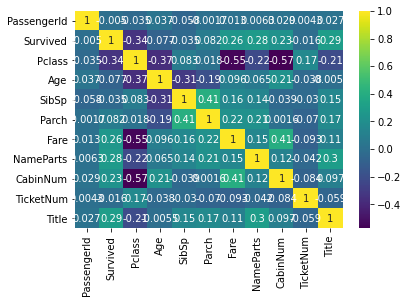

In [45]:
sns.heatmap(train_data.corr(), cmap='viridis', annot=True)

In [46]:
train_data.corr()['Survived']['Title'], train_data.corr()['Survived']['NameParts'], train_data.corr()['Title']['NameParts']

(0.29391103819519754, 0.27852011305098023, 0.29827306046504376)

In [47]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

TypeError: ignored

In [ ]:
enc.fit(np.array([get_title(v) for v in train_data['Name']]).reshape(-1, 1))
print(enc.categories_)
# np.unique(enc.transform(np.array([get_title(v) for v in train_data['Name']]).reshape(-1, 1)))
enc.transform(np.array([get_title(v) for v in test_data['Name']]).reshape(-1, 1))[:5]

In [48]:
train_data['Comrades'] = [1 if v > 0 else 0 for v in train_data['SibSp'] + train_data['Parch']]

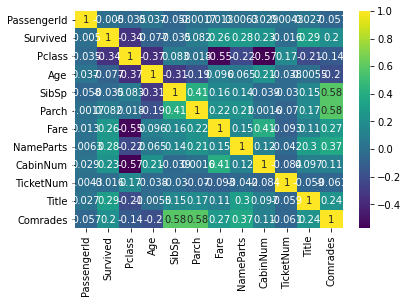

In [49]:
sns.heatmap(train_data.corr(), cmap='viridis', annot=True)

In [50]:
tresholds = data['Age'].quantile(np.linspace(0.1, 0.9, 9)).values
tresholds

array([14., 19., 22., 25., 28., 31., 36., 42., 50.])

In [51]:
ageLvls = []
for v in train_data['Age']:
  i = 0
  for c in tresholds:
    if v > c:
      i += 1
  ageLvls.append(i)
set(ageLvls)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [52]:
len(ageLvls) == len(train_data['Age'])

True

In [53]:
train_data['AgeLvl'] = ageLvls

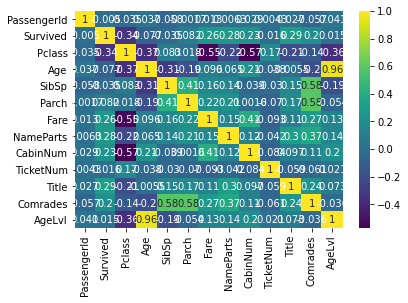

In [54]:
sns.heatmap(train_data.corr(), cmap='viridis', annot=True)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


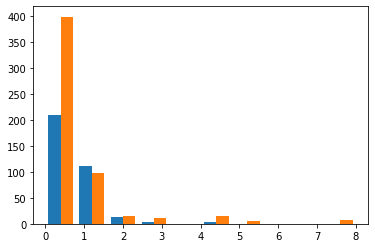

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


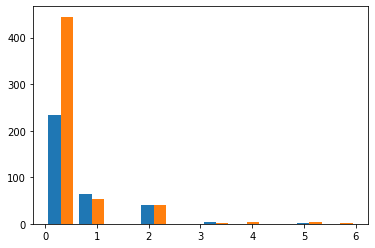

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


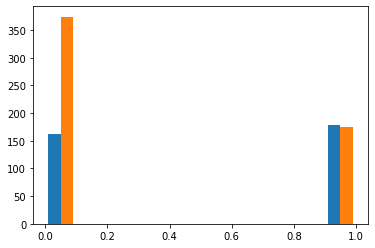

In [62]:
plt.hist([sorted(train_data['SibSp'][train_data['Survived']==1]), sorted(train_data['SibSp'][train_data['Survived']==0])])
plt.show()
plt.hist([sorted(train_data['Parch'][train_data['Survived']==1]), sorted(train_data['Parch'][train_data['Survived']==0])])
plt.show()
plt.hist([sorted(train_data['Comrades'][train_data['Survived']==1]), sorted(train_data['Comrades'][train_data['Survived']==0])])
plt.show()

cabines

In [70]:
cabin = [re.sub('\d', '', v)[0] if type(v) == str else 'Z' for v in train_data['Cabin']]
cabin_enc = [ord(v) for v in cabin]
len(cabin_enc) == len(train_data)

True

In [71]:
train_data['CabinLvl'] = cabin_enc
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NameParts,CabinNum,TicketNum,Title,Comrades,AgeLvl,CabinLvl
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,4,0,521171,0,1,2,90
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,7,85,17599,2,1,7,67
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3,0,23101282,1,0,4,90
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,7,123,113803,2,1,6,67
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,4,0,373450,0,0,6,90


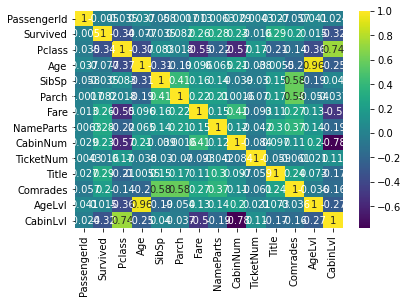

In [72]:
sns.heatmap(train_data.corr(), cmap='viridis', annot=True)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


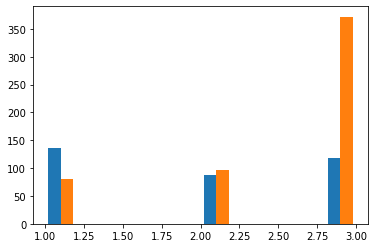

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


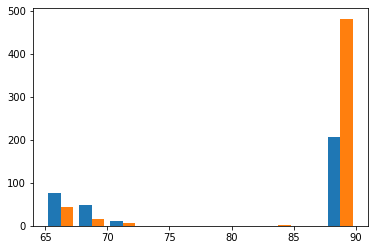

In [75]:
plt.hist([sorted(train_data['Pclass'][train_data['Survived']==1]), sorted(train_data['Pclass'][train_data['Survived']==0])])
plt.show()
plt.hist([sorted(train_data['CabinLvl'][train_data['Survived']==1]), sorted(train_data['CabinLvl'][train_data['Survived']==0])])
plt.show()